In [0]:
import tensorflow as tf

In [0]:
tf.enable_eager_execution()

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from tensorflow import keras

In [0]:
sentences  = ["I love my dog"," I love my cat","How do you find my dog?"]

In [0]:
tokenizer  = Tokenizer(num_words=100)

In [0]:
tokenizer.fit_on_texts(sentences)

In [0]:
word_index = tokenizer.word_index

In [0]:
print(word_index)

{'my': 1, 'i': 2, 'love': 3, 'dog': 4, 'cat': 5, 'how': 6, 'do': 7, 'you': 8, 'find': 9}


In [0]:
sequences = tokenizer.texts_to_sequences(sentences)

In [0]:
print(sequences)

[[2, 3, 1, 4], [2, 3, 1, 5], [6, 7, 8, 9, 1, 4]]


In [0]:
pad = pad_sequences(sequences)

In [0]:
print(pad)

[[0 0 2 3 1 4]
 [0 0 2 3 1 5]
 [6 7 8 9 1 4]]


In [73]:
!wget --no-check-certificate \https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \-O /tmp/sarcasm.json

--2020-02-10 19:18:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2020-02-10 19:18:40 (48.5 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
import json

with open(r"/tmp/sarcasm.json") as data:
  datastore = json.load(data)

In [75]:
datastore[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [76]:
datastore[0]['article_link']

'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5'

In [0]:
article_link = []
headline = []
is_sarcastic = []

for line in range(len(datastore)):
  article_link.append(datastore[line]['article_link'])
  headline.append(datastore[line]['headline'])
  is_sarcastic.append(datastore[line]['is_sarcastic'])

In [0]:
import pandas as pd

In [0]:
cat_data = {'article_link':article_link,'headline':headline,'is_sarcastic':is_sarcastic}

In [0]:
df = pd.DataFrame(data=cat_data)

In [81]:
df.head()

article_link  ... is_sarcastic
0  https://www.huffingtonpost.com/entry/versace-b...  ...            0
1  https://www.huffingtonpost.com/entry/roseanne-...  ...            0
2  https://local.theonion.com/mom-starting-to-fea...  ...            1
3  https://politics.theonion.com/boehner-just-wan...  ...            1
4  https://www.huffingtonpost.com/entry/jk-rowlin...  ...            0

[5 rows x 3 columns]

In [0]:
vocab_size =10000
embedding_dim =16
max_length =32
trunc ='post'
padd = 'post'
oov_tok='<OOV>'
train_size = 20000

In [0]:
training_labels = np.array(is_sarcastic[:train_size])
test_labels = np.array(is_sarcastic[train_size:])

In [0]:
training_data = headline[:train_size]
test_data = headline[train_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)

In [0]:
tokenizer.fit_on_texts(training_data)

In [0]:
word_index = tokenizer.index_word

In [0]:
train_sequence = tokenizer.texts_to_sequences(training_data) 

In [0]:
train_padded = pad_sequences(train_sequence,padding=padd, truncating=trunc,maxlen=max_length)

In [0]:
test_sequence = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequence,maxlen=max_length,padding=padd,truncating=trunc) 

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs=10  

In [116]:
history = model.fit(train_padded,training_labels,epochs=num_epochs,verbose=2,validation_data=(test_padded,test_labels))

Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 - 3s - loss: 0.5491 - acc: 0.7117 - val_loss: 0.3977 - val_acc: 0.8332
Epoch 2/10
20000/20000 - 3s - loss: 0.3086 - acc: 0.8745 - val_loss: 0.3480 - val_acc: 0.8489
Epoch 3/10
20000/20000 - 3s - loss: 0.2308 - acc: 0.9096 - val_loss: 0.3436 - val_acc: 0.8529
Epoch 4/10
20000/20000 - 3s - loss: 0.1855 - acc: 0.9313 - val_loss: 0.3633 - val_acc: 0.8523
Epoch 5/10
20000/20000 - 3s - loss: 0.1534 - acc: 0.9449 - val_loss: 0.3944 - val_acc: 0.8520
Epoch 6/10
20000/20000 - 3s - loss: 0.1299 - acc: 0.9529 - val_loss: 0.4296 - val_acc: 0.8466
Epoch 7/10
20000/20000 - 3s - loss: 0.1105 - acc: 0.9610 - val_loss: 0.4729 - val_acc: 0.8441
Epoch 8/10
20000/20000 - 3s - loss: 0.0950 - acc: 0.9682 - val_loss: 0.5389 - val_acc: 0.8347
Epoch 9/10
20000/20000 - 3s - loss: 0.0833 - acc: 0.9727 - val_loss: 0.5664 - val_acc: 0.8344
Epoch 10/10
20000/20000 - 3s - loss: 0.0713 - acc: 0.9779 - val_loss: 0.6410 - val_acc: 0.8296


In [0]:
import matplotlib.pyplot as plt

def plotgraphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.show()

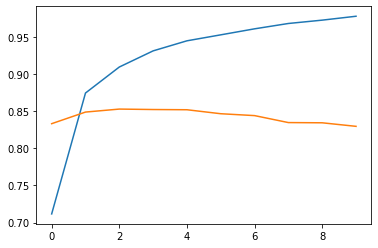

In [119]:
plotgraphs(history=history,string='acc')

# Overfitting

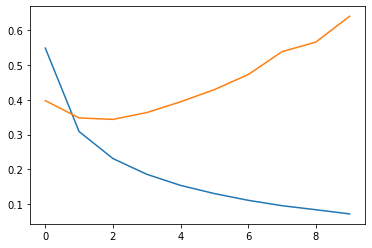

In [120]:
plotgraphs(history=history,string='loss')

In [0]:
import tensorflow_datasets as tfds

In [0]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [0]:
train_data, test_data = imdb['train'], imdb['test']

In [0]:
train_sentences = []
train_labels = []

test_sentences =[]
test_labels = []

for s,l in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())

for s,l in train_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

In [0]:
train_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [0]:
import numpy as np

In [0]:
train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)

## Now tokenize the train_sentences and test_sentences

In [0]:
vocab_size =10000
embedding_dim =16
max_length =120
tranc ='post'
oov_tok = '<OOV'

In [0]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

In [0]:
word_index = tokenizer.word_index # word 2 code 

In [0]:
sequences  = tokenizer.texts_to_sequences(train_sentences)

In [0]:
padded_train = pad_sequences(sequences,maxlen=max_length,padding=tranc)

In [0]:
testing_sequence = tokenizer.texts_to_sequences(test_sentences)
padded_test = pad_sequences(testing_sequence,maxlen=max_length)

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(padded_train[1])
print(decode_review(padded_train[1]))
print(train_sentences[1])

[ 256   28   78  585    6  815 2383  317  109   19   12    7  643  696
    6    4 2249    5  183  599   68 1483  114 2289    3 4005   22    2
    1    3  263   43 4754    4  173  190   22   12 4126   11 1604 2383
   87    2   20   14 1945    2  115  950   14 1838 1367  563    3  365
  183  477    6  602   19   17   61 1845    5   51   14 4090   98   42
  138   11  983   11  200   28 1059  171    5    2   20   19   11  298
    2 2182    5   10    3  285   43  477    6  602    5   94  203    1
  206  102  148 4450   16  228  336   11 2510  392   12   20   32   31
   47    0    0    0    0    0    0    0]
b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 10
model.fit(padded_train, train_labels_final, epochs=num_epochs, validation_data=(padded_test, test_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


25000/25000 [==============================] - 7s 297us/sample - loss: 0.4648 - acc: 0.7564 - val_loss: 0.2227 - val_acc: 0.9206
Epoch 2/10
25000/25000 [==============================] - 6s 258us/sample - loss: 0.2175 - acc: 0.9177 - val_loss: 0.1162 - val_acc: 0.9712
Epoch 3/10
25000/25000 [==============================] - 6s 258us/sample - loss: 0.0972 - acc: 0.9739 - val_loss: 0.0835 - val_acc: 0.9740
Epoch 4/10
25000/25000 [==============================] - 6s 257us/sample - loss: 0.0309 - acc: 0.9954 - val_loss: 0.0437 - val_acc: 0.9859
Epoch 5/10
25000/25000 [==============================] - 6s 259us/sample - loss: 0.0128 - acc: 0.9984 - val_loss: 0.0545 - val_acc: 0.9823
Epoch 6/10
25000/25000 [==============================] - 7s 265us/sample - loss: 0.0062 - acc: 0.9992 - val_loss: 0.0739 - val_acc: 0.9769
Epoch 7/10
25000/25000 [==============================] - 7s 263us/sample - loss: 0.0024 - acc: 0.9998 - val_loss: 0.0540 - val_acc: 0.9844
Epoch 8/10
25000/25000 [=======

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')